1. Compress  (it s much more depenedetn on train dataset so it not used)
2. Encrypt  (it may use may not use)
3. Noise Removal (remove the net from images )
4. 

neural netrok unsuprevised learning ... its only a simple example 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist 


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()   # i am not using the y lable 

In [5]:
# perofm normalization 

X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

In [6]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
# we use direct DENSE not using conv and flatten here the values 
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [13]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [14]:
from keras.models import Model #not use sequential 
from keras.layers import Input, Dense #specify input 


In [15]:
input_img = Input(shape=(784,))  #input layer 
encoder = Dense(128, activation='relu')(input_img)  #specify parameter of input 
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)


decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)


# now lets create the auto encoder 



In [16]:
autoencoder = Model(input_img, decoder ) #(input, output)
autoencoder.compile(optimizer='adadelta',
                   loss='binary_crossentropy'
                   )
autoencoder.fit(X_train, X_train,
               epochs=50,
               batch_size = 256,
               validation_data = (X_test, X_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.3226 - val_loss: 0.2618
Epoch 2/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2541 - val_loss: 0.2419
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2308 - val_loss: 0.2216
Epoch 4/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2144 - val_loss: 0.2058
Epoch 5/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2005 - val_loss: 0.1951
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1925 - val_loss: 0.1857
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1826 - val_loss: 0.1781
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1746 - val_loss: 0.1694
Epoch 9/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1690 - val_loss: 0.1641
Epoch

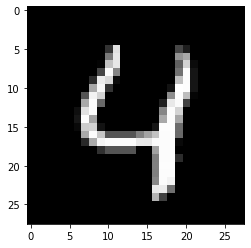

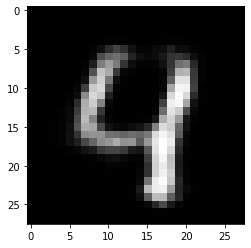

In [24]:
i=4
plt.imshow(X_test[i].reshape(28,28), cmap='gray')  #image is flatted so reshape it 
plt.show()

out = autoencoder.predict(X_test[i].reshape(1,-1))  #1,784 for single image
plt.imshow(out[0].reshape(28,28), cmap="gray")
plt.show()